In [65]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

In [67]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [68]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [69]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [70]:
train_df[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [71]:
train_df[["Parch","Survived"]].groupby(['Parch'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


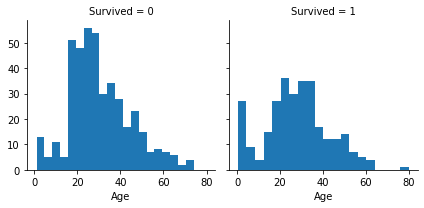

In [72]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

C:\Users\yun\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


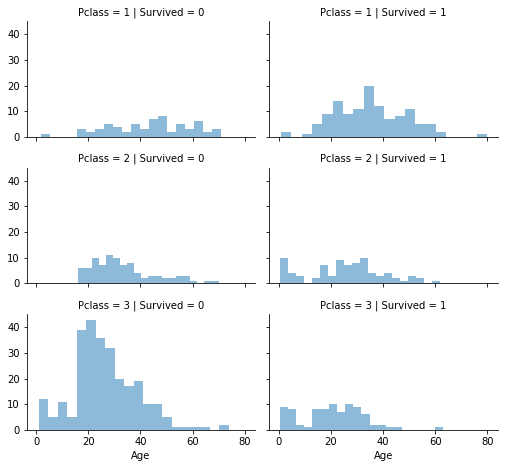

In [73]:
grid = sns.FacetGrid(train_df,col="Survived",row="Pclass",size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

C:\Users\yun\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\yun\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


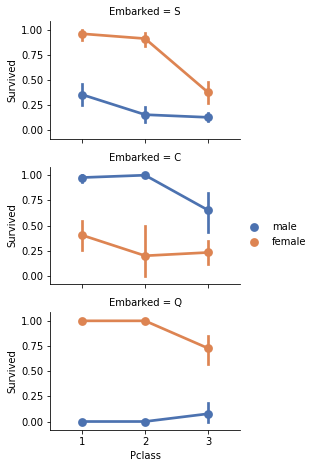

In [74]:
grid= sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

C:\Users\yun\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\yun\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


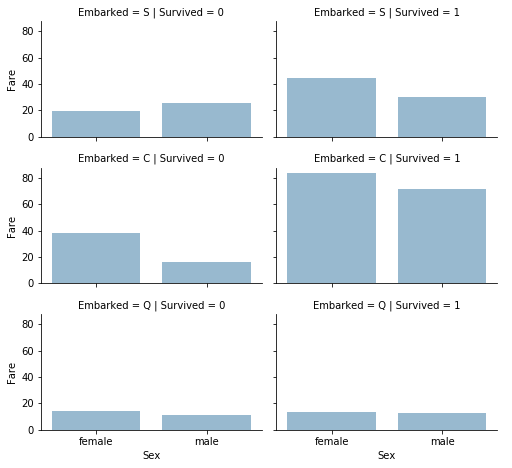

In [75]:
grid = sns.FacetGrid(train_df,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

In [76]:
print("Before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df,test_df]

print("After",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [77]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [78]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr',
                                               'Major','Rev','Sir','Jonkheer','Dona'],'Others')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.347826


In [79]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Others":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [80]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine = [train_df,test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [81]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({"female":1, "male":0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


C:\Users\yun\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


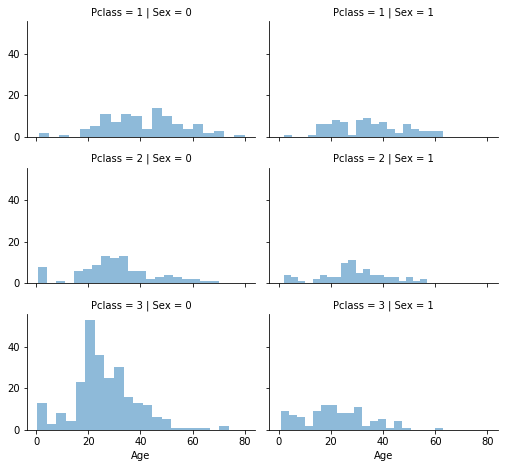

In [82]:
grid = sns.FacetGrid(train_df,row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [83]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [84]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i)&
                              (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            
            #Convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5+0.5)*0.5
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & 
                       (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [85]:
train_df['AgeBound'] = pd.cut(train_df['Age'],5)
train_df[['AgeBound','Survived']].groupby(['AgeBound'],
                                        as_index=False).mean().sort_values(by='AgeBound',ascending=True)

,AgeBound,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [86]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32),'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48),'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64),'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] 
    
train_df.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBound
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [87]:
train_df = train_df.drop(['AgeBound'],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [88]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']+1
    
train_df[['Family','Survived']].groupby(['Family'],
                                        as_index=False).mean().sort_values(by='Survived',ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [89]:
for dataset in combine:
    dataset['Single'] = 0
    dataset.loc[dataset['Family']==1,'Single'] = 1
    
train_df[['Single','Survived']].groupby(['Single'], as_index=False).mean()

,Single,Survived
0,0,0.505650
1,1,0.303538


In [90]:
train_df = train_df.drop(['Parch','SibSp','Family'],axis=1)
test_df = test_df.drop(['Parch','SibSp','Family'],axis=1)
combine = [train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Single
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [91]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_df.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [92]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [93]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].groupby(['Embarked'],
                                         as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [94]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Single,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [95]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Single,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [96]:
train_df['FareBound'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBound','Survived']].groupby(['FareBound'],
                                          as_index=False).mean().sort_values(by='FareBound',ascending=True)

,FareBound,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [97]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31),'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBound'],axis=1)
combine = [train_df,test_df]

train_df.head(10)
    

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Single,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [98]:
train_X = train_df.drop('Survived',axis=1)
train_Y = train_df['Survived']
test_X = test_df.drop("PassengerId",axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

((891, 8), (891,), (418, 8))

In [99]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train_X,train_Y)
pred_Y = logreg.predict(test_X)
acc_log = round(logreg.score(train_X,train_Y) * 100, 2)
acc_log

80.36

In [100]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,Single,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


In [101]:
# Support Vector Machines

svc = SVC()
svc.fit(train_X,train_Y)
pred_Y = svc.predict(test_X)
acc_svc = round(svc.score(train_X,train_Y) * 100, 2)
acc_svc

78.23

In [102]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X,train_Y)
pred_Y = knn.predict(test_X)
acc_knn = round(knn.score(train_X,train_Y)*100, 2)
acc_knn

84.74

In [103]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train_X,train_Y)
pred_Y = gaussian.predict(test_X)
acc_gaussian = round(gaussian.score(train_X,train_Y) * 100, 2)
acc_gaussian

72.28

In [104]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train_X,train_Y)
pred_Y = perceptron.predict(test_X)
acc_perceptron = round(perceptron.score(train_X,train_Y) * 100, 2)
acc_perceptron

78.34

In [105]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train_X,train_Y)
pred_Y = linear_svc.predict(test_X)
acc_linear_svc = round(linear_svc.score(train_X,train_Y) * 100, 2)
acc_linear_svc

C:\Users\yun\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.12

In [106]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train_X,train_Y)
pred_Y = sgd.predict(test_X)
acc_sgd = round(sgd.score(train_X,train_Y)*100, 2)
acc_sgd

73.29

In [107]:
# Decision Tree

d_tree = DecisionTreeClassifier()
d_tree.fit(train_X,train_Y)
pred_Y = d_tree.predict(test_X)
acc_d_tree = round(d_tree.score(train_X,train_Y)*100, 2)
acc_d_tree

86.76

In [108]:
# Random Forest

r_f = RandomForestClassifier(n_estimators=100)
r_f.fit(train_X,train_Y)
pred_Y = r_f.predict(test_X)
r_f.score(train_X,train_Y)
acc_r_f = round(r_f.score(train_X,train_Y)*100, 2)
acc_r_f

submission = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived" : pred_Y
})

submission.to_csv("Result_2.csv",index=False)

In [60]:
model = pd.DataFrame({
    'Model' : ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree'],
    'Score' : [acc_svc, acc_knn, acc_log, acc_r_f, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_d_tree]})

sorted_model = model.sort_values(by='Score',ascending=False)
sorted_model

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.34
0,Support Vector Machines,78.23
4,Naive Bayes,72.28
6,Stochastic Gradient Decent,67.68


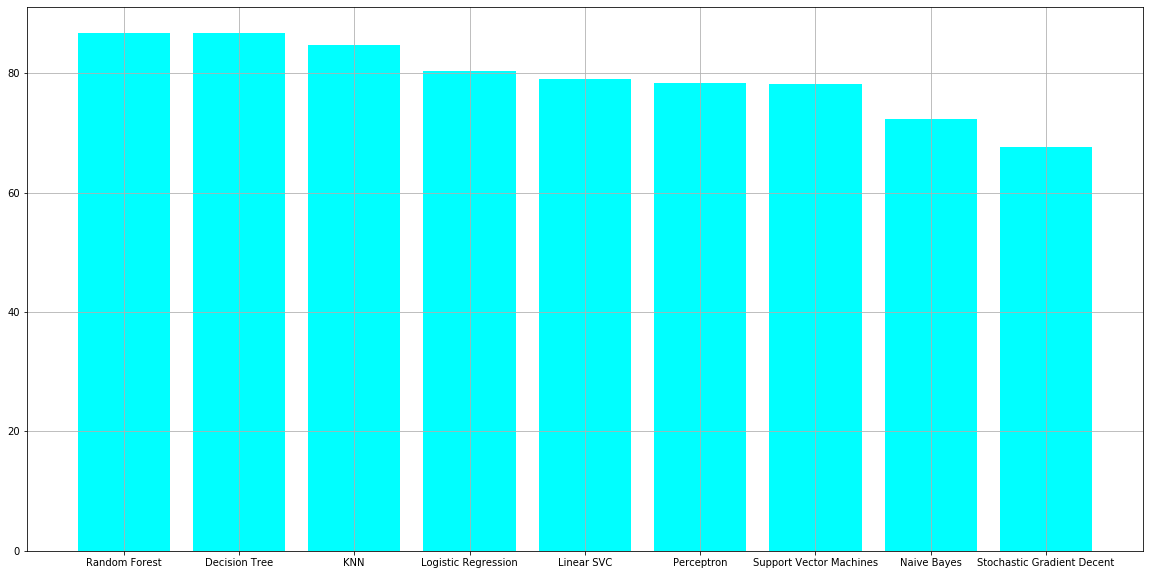

In [61]:
plt.figure(figsize=(20,10))
fig = plt.bar(sorted_model['Model'],sorted_model['Score'],color='aqua')
plt.grid()
plt.show()

In [ ]:
model_f = 

In [62]:
submission = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived" : pred_Y
})
submission.to_csv('submisson2.csv',index=False)